# Data Analysis Examples

### Bitly Data from 1.USA.gov

In [16]:
import numpy as np
import pandas as pd

In [17]:
# The following dataset tracks data from users who shorten links ending with .gov or .mil, and 
# is held in the form of JSON data.
path = "datasets/bitly_usagov/example.txt"

with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [18]:
# The json module can read in a json file and convert the strings into a Python dictionary
import json

with open(path) as f:
    records = [json.loads(line) for line in f]

In [19]:
# records is now a list of Python dictionaries
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [20]:
# Suppose we wanted to extract a list of time zones using a list comprehension
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

In [6]:
# That failed because not every record has a timezone. We can change it to this:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

time_zones

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci

In [8]:
# Here's two ways to get a count of the time zones, one way using the standard Python library
# and one way using pandas. Start with standard library.

# Use a dictionary to store counts while iterating through time zones
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [9]:
# We could also use more advance tools in the Python standard library
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [10]:
# Now we can get counts of time zones
counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [11]:
len(time_zones)

3440

In [12]:
# Now if we want the top N time zones along with their counts we can obtain them in a tuple.
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [13]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [14]:
# The collections.Counter class from the Python standard library makes this task even easier
from collections import Counter

counts = Counter(time_zones)

counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [21]:
# Now we'll show how this is done with pandas.

# You can get a DataFrame directly from "records"
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [22]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [23]:
# Now we can get the time zone counts just using a call to the value_counts method function
tz_counts = frame["tz"].value_counts()
tz_counts.head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

In [24]:
# Let's say we want to give a plot of this info. We'll first replace the empty time zone data.
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"

tz_counts = clean_tz.value_counts()
tz_counts.head()

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

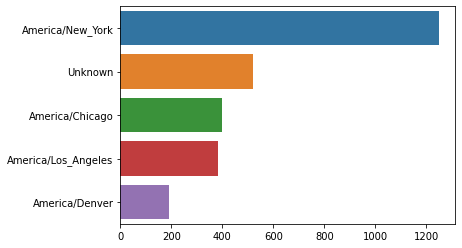

In [26]:
# Now we can use seaborn to make a horizontal bar plot
import seaborn as sns

subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy());

In [27]:
# The field "a" contains information about the browser, device, or application used to
# perform the URL shortening.
frame["a"][1]

'GoogleMaps/RochesterNY'

In [28]:
frame["a"][15]

'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [29]:
# Parsing these lines seems difficult, but we could start by splitting off the first token in the
# string and then making another summary of the user behavior
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [30]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
Dalvik/1.4.0                                            3
BlackBerry8520/5.0.0.592                                3
Goldfire                                                2
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
Acoon                                                   2
BlackBerry9530/5.0.0.328                                1
BlackBerry9700/5.0.0.423                                1
Vodafone/1.0/LG-KU990i/V10c                             1
LG-GW382f/V10d

In [31]:
# Now let's say we want to decompose the top time zones into Windows/non-Windows.

# First exclude missing data
cframe = frame[frame["a"].notna()].copy()

# Determine whether or not each row is Windows
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [33]:
# Now group by time zone and OS
by_tz_os = cframe.groupby(["tz", "os"])

# Group counts can be computed with "size" and made into a table with "unstack"
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [34]:
# We'll sort now by the top overall time zones by constructing an indrect index array from the
# row counts in agg_counts, calling agg_counts.sum("columns"), then calling argsort() to obtain
# an index array that can be used to sort in ascending order.
indexer = agg_counts.sum("columns").argsort()

indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

In [35]:
# Use "take" to select rows in the order we want
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [36]:
# pandas also has a method called "nlargest" which will do the same
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [37]:
# We can make a plot comparing the number of Windows and non-Windows users.
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


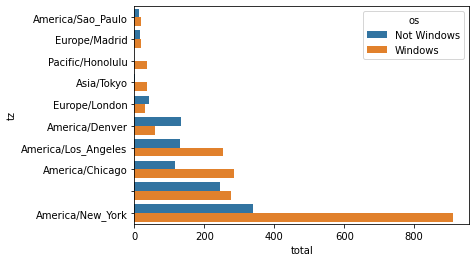

In [39]:
sns.barplot(x="total", y="tz", hue="os",  data=count_subset);

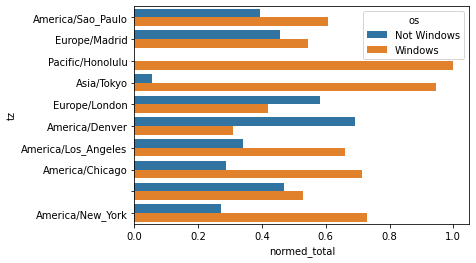

In [41]:
# To improve readability, we'll normalize the group percentages to sum to 1:
def norm_total(group):
    group["normed_total"] = group["total"]/group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

sns.barplot(x="normed_total", y="tz", hue="os",  data=results);


In [42]:
# Note: we could computed the normalized sum more efficiently using "groupby" and "transform"
g = count_subset.groupby("tz")
results2 = count_subset["total"]/g["total"].transform("sum")

### MovieLens 1M Dataset

The MovieLens 1M Dataset contains one million ratings collected from six thousand users on
four thousand movies. It's spread across three tables: ratings, user information, and movie information.

In [43]:
# We'll start by loading each table into a pandas DF
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::", header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::", header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::", header=None, names=mnames, engine="python")

In [44]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [45]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [46]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [49]:
# It will be easier to analyze the data if we combine the tables into one
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [50]:
# We get mean movie ratings by gender using the "pivot_table" method
mean_ratings = data.pivot_table("rating", index="title", columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [51]:
# See how many movies reviews are present for each title
ratings_by_title = data.groupby("title").size()

ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [52]:
# Filter to only those with more than 250 reviews
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [53]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [54]:
# See top films among women viewers
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [55]:
# One way to find movies with the biggest disagreements between male and female viewers is
# to add a column showing the difference in means
mean_ratings["difference"] = mean_ratings["M"] - mean_ratings["F"]

In [57]:
# Sorting by "diff" will give the movies with the greatest rating difference
sorted_by_diff = mean_ratings.sort_values("difference")
sorted_by_diff.head()

gender,F,M,difference
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [59]:
# To find the movies preferred by men, we reverse the order and take the top 10 rows
sorted_by_diff[::-1].head()

gender,F,M,difference
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [60]:
# To find the most divisive movies, we compute the standard deviate by title and filter
# to the active titles
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [61]:
# Now sort in descending order and grab the first ten movies
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [62]:
# Movie genres are pipe-separated strings
movies["genres"].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [64]:
# Collect the genres into strings without the pipes
movies["genres"].head().str.split("|")

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: genres, dtype: object

In [65]:
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [66]:
# Calling the "explode" method with argument "genre" will add a new row for each genre of a film
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [67]:
# Now merge the three tables and group by genre
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)

ratings_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [69]:
# List top ten categories sorted by genre and age
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])["rating"].mean().unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


### US Baby Names 1880-2010

The US SSA makes data files available on all of the baby names for each year.

In [70]:
# Here's the start of one of the files

!head -n 10 datasets/babynames/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [72]:
# This is already in comma-separated form so we can load it as a CSV file
names1880 = pd.read_csv("datasets/babynames/yob1880.txt", names = ["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [73]:
# Summing the births column by sex gives the total number of births per year
names1880.groupby("sex")["births"].sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [75]:
# In order to get a view of trends over time, we'll assemble all of the data
# into a single DF and add a year field.
pieces = []
for year in range(1880, 2023):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085532,Zoumana,M,5,2022
2085533,Zuberi,M,5,2022
2085534,Zylon,M,5,2022
2085535,Zymeer,M,5,2022


In [76]:
# Now groupby or pivot_table will allow us to start aggregating the data by year and/or sex
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2018,1699569,1814581
2019,1676568,1792223
2020,1614196,1723649
2021,1638188,1746499
2022,1636657,1741954


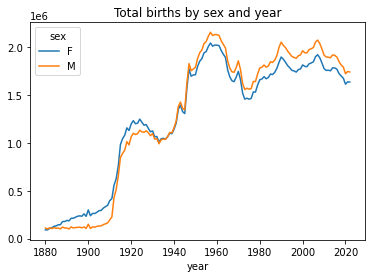

In [77]:
total_births.plot(title="Total births by sex and year");

In [79]:
# We'll add a column "prop" which gives the fraction of babies given each name relative to the total 
# number of births
def add_prop(group):
    group["prop"] = group["births"]/group["births"].sum()
    return group

names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2085532,Zoumana,M,5,2022,0.000003
2085533,Zuberi,M,5,2022,0.000003
2085534,Zylon,M,5,2022,0.000003
2085535,Zymeer,M,5,2022,0.000003


In [80]:
# Sanity check!
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 286, dtype: float64

In [81]:
# Get the top 1000 names for each sex/year combination
def get_top1000(group):
    return group.sort_values("births", ascending = False)[:1000]

grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077642
         1       Anna   F    2604  1880  0.028617
         2       Emma   F    2003  1880  0.022012
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [86]:
# Drop the group index
top1000 = top1000.reset_index(drop=True)

In [87]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Analyzing Naming Trends

In [88]:
# Split top 1000 names into boy and girl portions
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [90]:
# Form a pivot table of the total number of births by year and name
total_births = top1000.pivot_table("births", index="year", columns="name", aggfunc=sum)

total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1880 to 2022
Columns: 7318 entries, Aaden to Zyon
dtypes: float64(7318)
memory usage: 8.0 MB


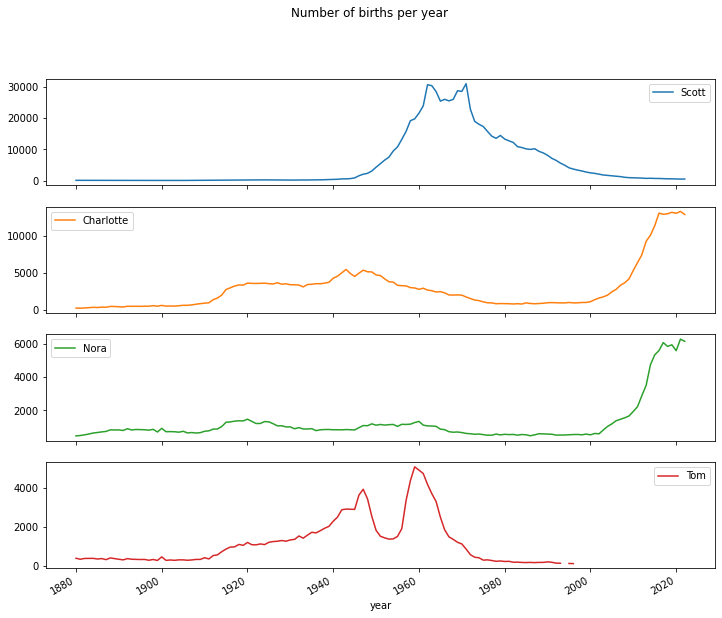

In [92]:
# Pick a few names to investigate
subset = total_births[["Scott", "Charlotte", "Nora", "Tom"]]

subset.plot(subplots=True, figsize=(12,10), title="Number of births per year");

Measuring the increase in naming diversity

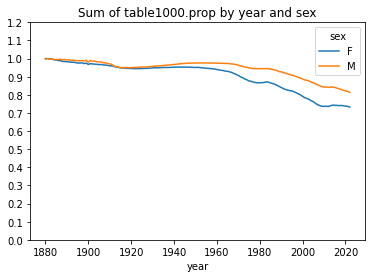

In [94]:
# Make a plot of the proportion of births represented by the top 1,000 most popular names
table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)

table.plot(title="Sum of table1000.prop by year and sex", yticks=np.linspace(0, 1.2, 13));

In [95]:
# Now suppose we want to compute the number of distinct names in order of popularity from the 
# top 50% of births

# Start by just getting the boy names from 2010
df = boys[boys["year"] == 2010]
df

,name,sex,births,year,prop
260876,Jacob,M,22148,2010,0.011547
260877,Ethan,M,18015,2010,0.009392
260878,Michael,M,17376,2010,0.009059
260879,Jayden,M,17198,2010,0.008966
260880,William,M,17068,2010,0.008898
...,...,...,...,...,...
261871,Truman,M,197,2010,0.000103
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102


In [96]:
# Say we want to know how many of the most popular names it takes to reach a proportion of 50%.
# We take a cumulative sum of prop and then call the method searchsorted to return the position in the
# cumulative sum at which 0.5 would need to be inserted to keep it in sorted order
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()

prop_cumsum[:10]

260876    0.011547
260877    0.020939
260878    0.029997
260879    0.038963
260880    0.047862
260881    0.056603
260882    0.065192
260883    0.073459
260884    0.081564
260885    0.089647
Name: prop, dtype: float64

In [97]:
prop_cumsum.searchsorted(0.5)

116

In [98]:
# Check the same stat for 1900
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5)

24

In [99]:
# Now apply this operation to each year/sex combination, groupby those fields, and apply
# a function returning the count for each group
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q)+1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

# "diversity" has two time series, one for each sex, indexed by year
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


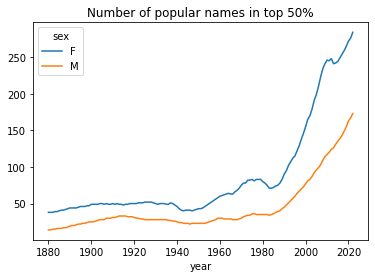

In [100]:
diversity.plot(title="Number of popular names in top 50%");

The "last letter" revolution

In [102]:
# Has the distribution of boy names by final letter changed over the last 100 years? Let's find out!

# First aggregate all of the births in the dataset by year, sex, and final letter:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters, columns=["sex", "year"], aggfunc=sum)

# Pick three representative years and print the first few rows
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691262.0  677461.0    977.0    5217.0   28900.0
b                 NaN     694.0     455.0    411.0    3913.0   39311.0
c                 5.0      49.0     958.0    482.0   15454.0   23373.0
d              6751.0    3731.0    2645.0  22111.0  262108.0   44871.0
e            133599.0  434981.0  317085.0  28665.0  178757.0  130374.0

In [103]:
# Normalize by total births to give a new table containing the proportion of total births for
# each sex ending in each letter
subtable.sum()

sex  year
F    1910     396503.0
     1960    2021888.0
     2010    1777014.0
M    1910     194208.0
     1960    2132033.0
     2010    1918132.0
dtype: float64

In [104]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341889  0.381236  0.005031  0.002447  0.015067
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020494
c            0.000013  0.000024  0.000539  0.002482  0.007248  0.012185
d            0.017026  0.001845  0.001488  0.113852  0.122938  0.023393
e            0.336943  0.215136  0.178437  0.147599  0.083843  0.067969
f                 NaN  0.000010  0.000055  0.000783  0.004330  0.001206
g            0.000144  0.000156  0.000376  0.002260  0.009488  0.001407
h            0.051531  0.036221  0.076013  0.045565  0.037915  0.051835
i            0.001526  0.039966  0.031699  0.000844  0.000609  0.022672
j                 NaN       NaN  0.000093       NaN       NaN  0.000773
k            0.000121  0.000155  0.000356  0.036579  0.049372  0.018530
l            0.043188  0.033874  0.026389  0.065023  0.104881  0.070452
m            0.001200  0.008612  0.002600  0.058046  0.033835  0.024706
n            0.079238  0.130673  0.140046  0.143388  0.152514  0.362402
o            0.001672  0.002438  0.001247  0.017064  0.012834  0.042554
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001268
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018045  0.064472  0.031051  0.087393
s            0.039036  0.012758  0.013339  0.130798  0.102695  0.065157
t            0.027432  0.015196  0.007837  0.072886  0.065643  0.022859
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001227
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001450
w            0.000020  0.000031  0.001190  0.006323  0.007704  0.016182
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008598
y            0.110975  0.152553  0.116748  0.077345  0.161013  0.058208
z            0.002436  0.000658  0.000699  0.000170  0.000184  0.001829

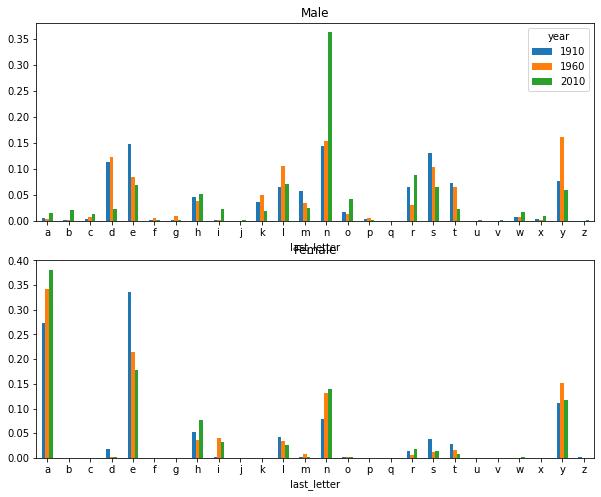

In [106]:
# Make bar plots for each sex, broken down by year
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False);

In [107]:
# Make a time series of the last letter data for a few letters
letter_prop = table/table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083238,0.153214,0.077461
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


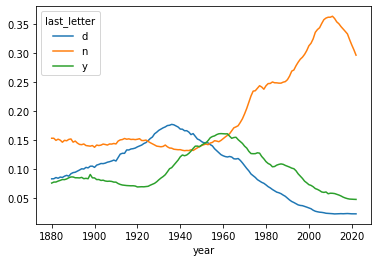

In [109]:
dny_ts.plot();

Boy names that became girl names (and vice versa)

In [110]:
# Look at how the name "Lesley/Leslie" has changed over time
all_names = pd.Series(top1000["name"].unique())

lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4730     Lesli
6102     Lesly
dtype: object

In [111]:
# Filter to names and sum births grouped by name to get the relative frequencies
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee      1083
Lesley     35038
Lesli        929
Leslie    380178
Lesly      11434
Name: births, dtype: int64

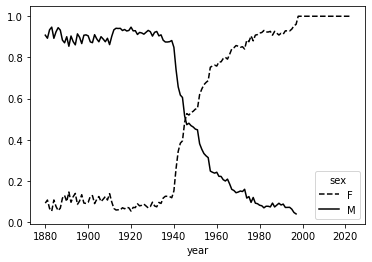

In [114]:
# Aggregate by sex and year, normalize within each year
table = filtered.pivot_table("births", index="year", columns="sex", aggfunc="sum")

table = table.div(table.sum(axis="columns"), axis="index")

# Plot the breakdown by sex over time for "Lesley-like" names
table.plot(style={"M": "k-", "F": "k--"});

### USDA Food Database